In [6]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt

from custom_utils.plate_detector import Plate_Detector
from custom_utils.coner_detector import Corner_Detector
from custom_utils.plate_type_classifier import Plate_Type_Classifier
from custom_utils.synthetic_plate_generator import Synthetic_Plate_Generator
from custom_utils.neural_algorithm_style_transfer import Synthetic_Plate_Generator_nueral
from custom_utils.pix2pix import Synthetic_Plate_Generator_pix2pix
from custom_utils.plate_synthesizer import Plate_Synthesizer

yolo_detector             = Plate_Detector(device='cuda:0', margin_gain=0.45)
corner_detector           = Corner_Detector(device='cuda')
plate_type_classifier     = Plate_Type_Classifier(device='cuda')
synthetic_plate_generator = Synthetic_Plate_Generator(device='cuda')
# synthetic_plate_generator = Synthetic_Plate_Generator_nueral(device='cuda')
# synthetic_plate_generator = Synthetic_Plate_Generator_pix2pix(device='cuda')
plate_synthesizer         = Plate_Synthesizer()

YOLOv5  2023-10-3 Python-3.8.16 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs


initialize network with normal



In [2]:
# 참고 
# 2006_eu : 79 / 2006_us : 78 / eco : 1 / 2004_n : 7 / 2006_n : 4 / 2019_r : 35 / 2019_n : 41

im = cv2.imread('./raw_images/car (292).jpg')
bboxes , bboxes_xy = yolo_detector.predict(im)
xy_list = corner_detector.predict(bboxes)
plate_type_list = plate_type_classifier.predict(bboxes, xy_list)
synthetic_plate_list = synthetic_plate_generator.predict(bboxes, xy_list, plate_type_list)
generater_type = synthetic_plate_generator.name
result_im = plate_synthesizer.predict(im, xy_list, bboxes, bboxes_xy, synthetic_plate_list, generater_type);

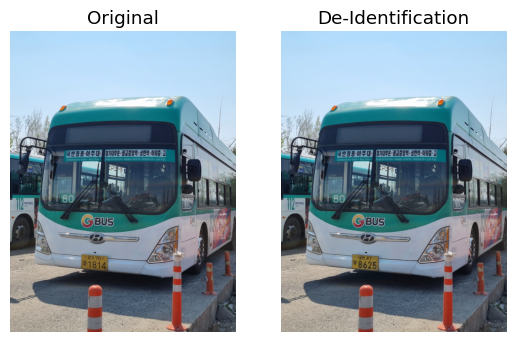

True

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.title("Original")
plt.axis("off")
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title("De-Identification")
plt.axis("off")
plt.imshow(cv2.cvtColor(result_im, cv2.COLOR_BGR2RGB))
plt.show()

cv2.imwrite("original.jpg", im)
cv2.imwrite("de_identification.jpg", result_im)

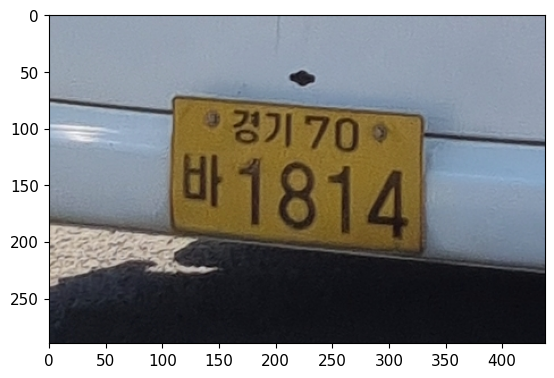

In [4]:
# corner detector 확인코드

%matplotlib inline
import matplotlib.pyplot as plt
import cv2, copy
i = 0
# test = cv2.resize(bboxes[i], (224, 224))
img = copy.deepcopy(bboxes[i])

# cv2.circle(img, (int(xy_list[i][0][0]), int(xy_list[i][0][4])), 5, (255,0,0),-1);
# cv2.circle(img, (int(xy_list[i][0][1]), int(xy_list[i][0][5])), 5, (0,255,0),-1);
# cv2.circle(img, (int(xy_list[i][0][2]), int(xy_list[i][0][6])), 5, (0,0,255),-1);
# cv2.circle(img, (int(xy_list[i][0][3]), int(xy_list[i][0][7])), 5, (0,0,0),-1);

# cv2.circle(img, (int(xy_list[i][0][0]), int(xy_list[i][0][1])), 5, (255,0,0),-1);
# cv2.circle(img, (int(xy_list[i][0][2]), int(xy_list[i][0][3])), 5, (0,255,0),-1);
# cv2.circle(img, (int(xy_list[i][0][4]), int(xy_list[i][0][5])), 5, (0,0,255),-1);
# cv2.circle(img, (int(xy_list[i][0][6]), int(xy_list[i][0][7])), 5, (0,0,0),-1);


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()